<div >
<img src = "figs/banner.png" />
</div>

# Clase 04: Prepocesamiento de un conjunto de datos

##  Instalar/llamar las librerías de la clase

In [1]:
require(pacman) 
p_load(tidyverse,rio,skimr,viridis,
       gstat, #variogram
       sf, # Leer/escribir/manipular datos espaciales
       leaflet, # Visualizaciones dinámicas
       tmaptools, # geocode_OSM()
       nngeo, # st_nn function
       spdep, # Construct neighbours list from polygon list 
       osmdata) # Get OSM's data

Loading required package: pacman



## Cargando los Datos


### Cargando Datos de Propiedades

In [14]:
houses <- import("input/house_prices.rds")

In [3]:
class(houses)

[1] "data.frame"

In [4]:
str(houses)

'data.frame':	239343 obs. of  27 variables:
 $ V1             : int  1 2 3 4 5 6 7 8 9 10 ...
 $ id             : chr  "hAv2f68Zh76gc8Y76dDK5A==" "xj4oZfMeI/bzfOLsZNloeQ==" "6vaUZGrqA+nV75QQ+m3akg==" "ia6a/XwU0DNFRz+dMIKbcQ==" ...
 $ ad_type        : chr  "Propiedad" "Propiedad" "Propiedad" "Propiedad" ...
 $ start_date     : IDate, format: "2019-09-04" "2019-09-04" ...
 $ end_date       : IDate, format: "2020-03-26" "2020-07-17" ...
 $ created_on     : IDate, format: "2019-09-04" "2019-09-04" ...
 $ lat            : num  4.58 11 6.25 10.97 4.61 ...
 $ lon            : num  -74.2 -74.8 -75.6 -74.8 -74.1 ...
 $ l1             : chr  "Colombia" "Colombia" "Colombia" "Colombia" ...
 $ l2             : chr  "Cundinamarca" "Atlántico" "Antioquia" "Atlántico" ...
 $ l3             : chr  "Bogotá D.C" "Barranquilla" "Medellín" "Barranquilla" ...
 $ l4             : chr  "Zona Sur" "" "Candelaria" "" ...
 $ l5             : chr  "Ciudad Bolívar" "" "" "" ...
 $ l6             : chr  "" "" "" "

#### To spatial

##### La Tierra no es plana.

![](figs/Projections.gif)

![](figs/mercator.gif)

![](figs/Mexico_Greenland.gif)

In [15]:
## dataframe to sf
houses <- st_as_sf(x = houses, ## datos
                    # "coords" is in x/y order -- so longitude goes first!
                   coords=c("lon","lat"), ## coordenadas
                   remove=FALSE, #remove=False hace que no borre estas columnas
  # Set our coordinate reference system to EPSG:4326,
  # the standard WGS84 geodetic coordinate reference system
                   crs=4326) ## CRS

In [16]:
class(houses)

[1] "sf"         "data.frame"

In [62]:
colnames(houses)

[1] "V1"              "id"              "ad_type"         "start_date"     
 [5] "end_date"        "created_on"      "lat"             "lon"            
 [9] "l1"              "l2"              "l3"              "l4"             
[13] "l5"              "l6"              "rooms"           "bedrooms"       
[17] "bathrooms"       "surface_total"   "surface_covered" "price"          
[21] "currency"        "price_period"    "title"           "description"    
[25] "property_type"   "operation_type"  "n"               "geometry"

In [18]:
map1<- leaflet() %>% addTiles() %>% addCircleMarkers(data=houses[1:100,])
map1

HTML widgets cannot be represented in plain text (need html)

In [19]:
#workaround to show in Jupyter Notebook (not needed in Rstudio)
p_load("htmlwidgets","IRdisplay")

saveWidget(map1, 'demo1.html', selfcontained = FALSE)
display_html('<iframe src="demo1.html" width="800" height="800"></iframe>')

### Cargando Datos de Ciclovias

In [20]:
ciclovias <-st_read("input/Ciclovia")

Reading layer `Ciclovia' from data source 
  `/Users/iggy/Dropbox/Ragnar/WWW/Personal_Website/ignaciomsarmiento.github.io/teaching/BDML/Lecture04/input/Ciclovia' 
  using driver `ESRI Shapefile'
Simple feature collection with 14 features and 0 fields
Geometry type: MULTILINESTRING
Dimension:     XY
Bounding box:  xmin: -8259020 ymin: 503642.3 xmax: -8241180 ymax: 530774.2
Projected CRS: WGS 84 / Pseudo-Mercator


In [21]:
head(ciclovias)

geometry                      
1 MULTILINESTRING ((-8244959 ...
2 MULTILINESTRING ((-8246679 ...
3 MULTILINESTRING ((-8244496 ...
4 MULTILINESTRING ((-8241248 ...
5 MULTILINESTRING ((-8248013 ...
6 MULTILINESTRING ((-8248700 ...

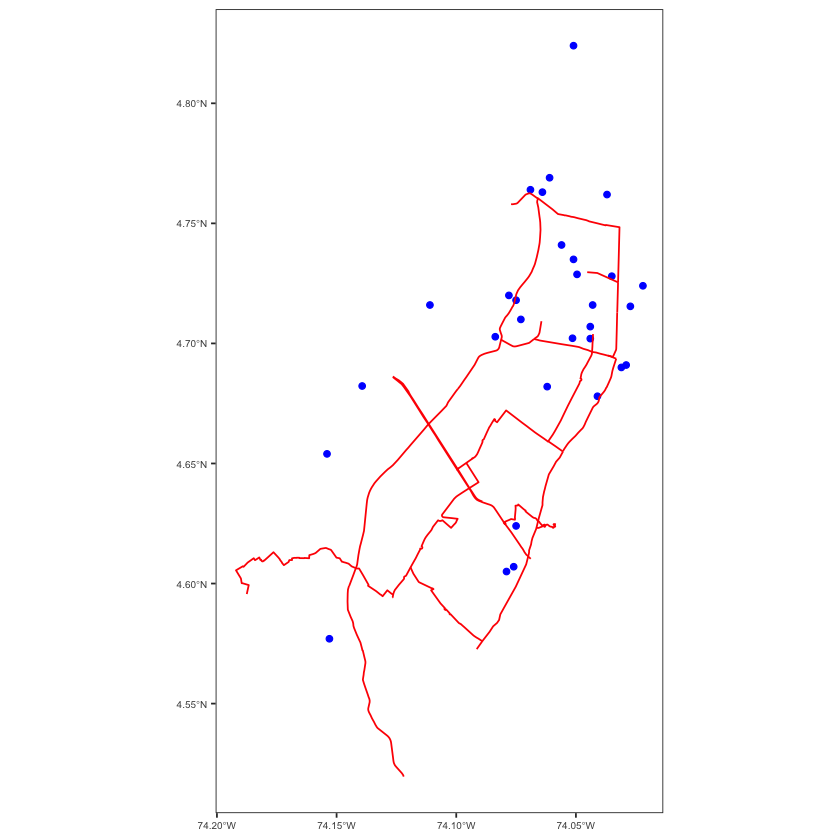

In [31]:
ggplot()+
  geom_sf(data=houses[1:100,]  %>% filter(l3=="Bogotá D.C"),col="blue")+
  geom_sf(data=ciclovias,col="red") +
  theme_bw() +
  theme(axis.title =element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.text = element_text(size=6))

### Cargando Datos del Censo

In [32]:
mnz <- import("input/mgn_censo_2018.rds")

In [33]:
map2<- leaflet() %>% addTiles() %>% addPolygons(data=mnz[1:100,])
map2

HTML widgets cannot be represented in plain text (need html)

In [34]:
#workaround to show in Jupyter Notebook (not needed in Rstudio)
saveWidget(map2, 'demo2.html', selfcontained = FALSE)
display_html('<iframe src="demo2.html" width="800" height="800"></iframe>')

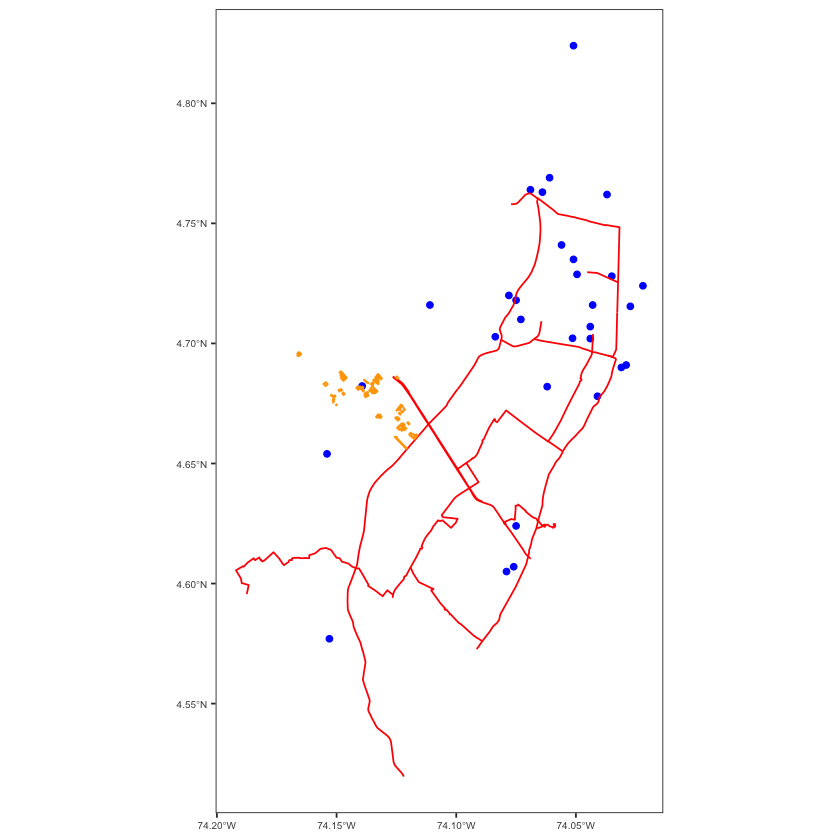

In [36]:
ggplot()+
  geom_sf(data=houses[1:100,]  %>% filter(l3=="Bogotá D.C"),col="blue")+
  geom_sf(data=ciclovias,col="red") +
  geom_sf(data=mnz[1:100,],col="orange") +
  theme_bw() +
  theme(axis.title =element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.text = element_text(size=6))

### Cargando Datos de Colegios

In [37]:
## Colegios
browseURL("https://datosabiertos.bogota.gov.co/dataset/resultados-pruebas-saber-11-bogota-d-c")

In [38]:
colegio <- st_read("input/col_saber_11.shp") %>% select(COD_DANE12,COLEGIO_SE,P_PUNTAJE)

colegio



Reading layer `col_saber_11' from data source 
  `/Users/iggy/Dropbox/Ragnar/WWW/Personal_Website/ignaciomsarmiento.github.io/teaching/BDML/Lecture04/input/col_saber_11.shp' 
  using driver `ESRI Shapefile'
Simple feature collection with 1138 features and 63 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -74.3642 ymin: 3.98618 xmax: -74.01831 ymax: 4.824433
Geodetic CRS:  WGS 84


COD_DANE12   COLEGIO_SE                                             
1    311848000693 COLEGIO DE INGLATERRA (THE ENGLISH SCHOOL)             
2    311848000782 GIMNASIO LOS PINOS                                     
3    311848000791 COLEGIO DE NUESTRA SEÑORA DEL BUEN CONSEJO             
4    311848000812 GIMNASIO FEMENINO                                      
5    311848000821 COLEGIO PROVINMA                                       
6    311848000847 COLEGIO MIGUEL ANTONIO CARO                            
7    311848000936 COLEGIO SANTA MARIA                                    
8    311848000995 COLEGIO CARDENAL SANCHA                                
9    311848001011 COLEGIO ANGLO COLOMBIANO                               
10   311848002262 COLEGIO ITALIANO LEONARDO DA VINCI                     
11   311848002271 COLEGIO DE LA SALLE                                    
12   311848002351 COLEGIO SANTA FRANCISCA ROMANA                         
13   111001000132 COLEGIO AQUILEO PARRA (IED)                            
14   111001029955 COLEGIO AGUSTIN FERNANDEZ (IED)                        
15   111001044806 COLEGIO FRIEDRICH NAUMANN (IED)                        
16   111001046957 COLEGIO TOBERIN (IED)                                  
17   111001086681 COLEGIO NUEVO HORIZONTE (IED)                          
18   111001098612 COLEGIO LA ESTRELLITA (IED)                            
19   111001102059 COLEGIO UNION COLOMBIA (IED)                           
20   111001107743 COLEGIO SALUDCOOP NORTE (IED)                          
21   111848000911 COLEGIO DE BACHILLERATO PATRIA                         
22   111848002522 INSTITUTO PEDAGOGICO NACIONAL                          
23   111848002662 COLEGIO USAQUEN (IED)                                  
24   111848002689 COLEGIO DIVINO MAESTRO (IED)                           
25   111848003031 COLEGIO CRISTOBAL COLON (IED)                          
26   111848003910 COLEGIO GENERAL SANTANDER (IED)                        
27   311001000735 COLEGIO COLSUBSIDIO NORTE                              
28   311001002452 FUNDACION COLEGIO CLARA CASAS MORALES                  
29   311001003271 COLEGIO EUCARISTICO                                    
30   311001010781 COLEGIO CALASANZ                                       
⋮    ⋮            ⋮                                                      
1109 311001006466 COLEGIO PARROQUIAL SAN LUIS GONZAGA                    
1110 311001009007 COLEGIO PARROQUIAL DE NUESTRA SEÑORA                   
1111 311001010099 GIMNASIO SAN JOSE                                      
1112 311001012598 COLEGIO PARROQUIAL DEL INMACULADO CORAZON DE MARIA     
1113 311001016828 INSTITUTO SAN ANTONIO DE PADUA                         
1114 311001025207 COLEGIO ALVARO CAMARGO DE LA TORRE                     
1115 311001025819 COLEGIO MANUEL MURILLO TORO                            
1116 311001038911 LICEO JUAN MIGUEL                                      
1117 311001042977 COLEGIO RAFAEL MARIA CARRASQUILLA                      
1118 311001043850 EXTERNADO DEL SUR PSICOPEDAGOGICO                      
1119 311001043876 LICEO MAYOR DE PALERMO                                 
1120 311001051798 INSTITUTO PSICOPEDAGOGICO INTEGRAL                     
1121 311001075361 COLEGIO PSICOPEDAGOGICO AMERICANO DEL SUR              
1122 311001089981 INSTITUTO GUSTAVO ADOLFO BECQUER                       
1123 311001091293 COLEGIO COLOMBO FLORIDA BILINGÜE                       
1124 311001091081 GIMNASIO INTEGRAL GUATIQUIA                            
1125 311001092478 GIMNASIO OBREGON                                       
1126 311001093016 INSTITUTO MARMATOS SEDE 2                              
1127 311001094730 INSTITUTO SAN FRANCISCO                                
1128 311001098531 COLEGIO DIDASCALIO NUESTRA SEÑORA DE LA ESPERANZA      
1129 311001107629 INSTITUTO SAN PABLO APOSTOL                            
1130 311001108218 GIMNASIO ISRAEL                                        
1131 3110

In [39]:
summary(colegio$P_PUNTAJE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   254.5   269.6   276.1   296.2   389.2 

In [40]:
colegio <- colegio %>% subset(P_PUNTAJE>=quantile(P_PUNTAJE,0.9))

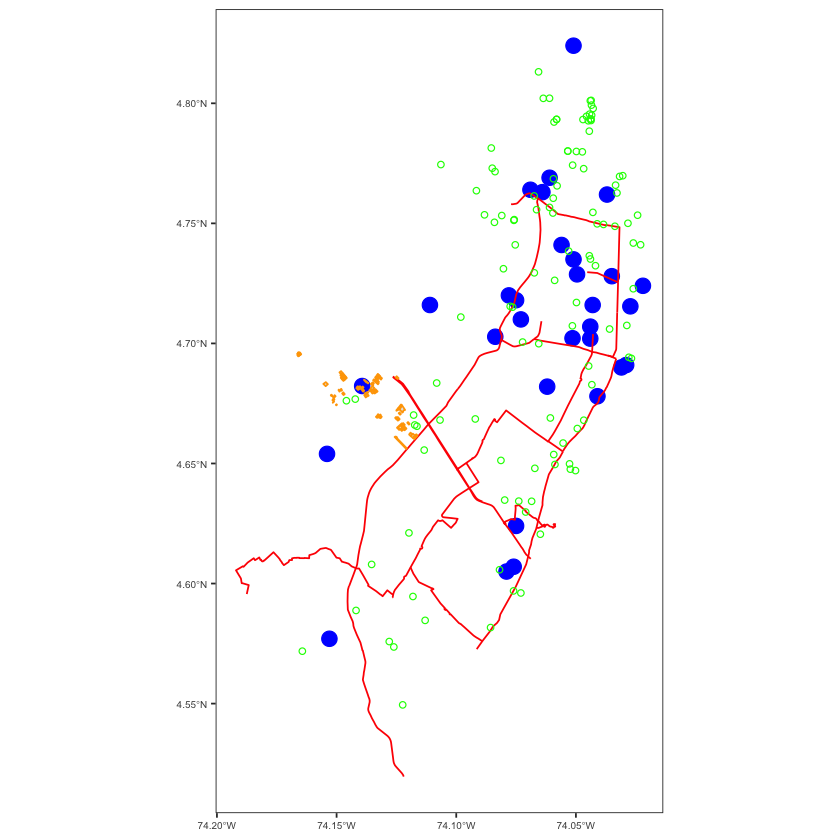

In [47]:
ggplot()+
  geom_sf(data=houses[1:100,]  %>% filter(l3=="Bogotá D.C"),col="blue",size=4)+
  geom_sf(data=ciclovias,col="red") +
  geom_sf(data=mnz[1:100,],col="orange") +
  geom_sf(data=colegio,col="green",shape=1) +
  theme_bw() +
  theme(axis.title =element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.text = element_text(size=6))

### CBD de Bogota

In [48]:
?geocode_OSM

In [49]:
cbd <- geocode_OSM("Centro Internacional, Bogotá", as.sf=T) 

cbd

query                        lat      lon       lat_min  lat_max  lon_min  
1 Centro Internacional, Bogotá 4.613615 -74.07057 4.613373 4.613889 -74.07098
  lon_max   bbox                           point                     
1 -74.07023 POLYGON ((-74.07098 4.61337... POINT (-74.07057 4.613615)

## Descargar datos de OSM

In [50]:
## parques
parques <- opq(bbox = getbb("Bogota Colombia")) %>%
           add_osm_feature(key = "leisure", value = "park") %>%
           osmdata_sf() %>% .$osm_polygons %>% select(osm_id,name)


In [51]:
map3<-leaflet() %>% addTiles() %>% addPolygons(data=parques)
map3

HTML widgets cannot be represented in plain text (need html)

In [52]:
#workaround to show in Jupyter Notebook (not needed in Rstudio)
saveWidget(map3, 'demo3.html', selfcontained = FALSE)
display_html('<iframe src="demo3.html" width="800" height="800"></iframe>')

In [53]:

## restaurantes
restaurantes <- opq(bbox = getbb("Bogota Colombia")) %>%
                add_osm_feature(key = "amenity", value = "restaurant") %>%
                osmdata_sf() %>% .$osm_points %>% select(osm_id,name)



In [54]:
map4<-leaflet() %>% addTiles() %>% addCircles(data=restaurantes)
map4

HTML widgets cannot be represented in plain text (need html)

In [55]:
#workaround to show in Jupyter Notebook (not needed in Rstudio)
saveWidget(map4, 'demo4.html', selfcontained = FALSE)
display_html('<iframe src="demo4.html" width="800" height="800"></iframe>')

In [56]:
## bancos
bancos <- opq(bbox = getbb("Bogota Colombia")) %>%
          add_osm_feature(key = "amenity", value = "bank") %>%
          osmdata_sf() %>% .$osm_points %>% select(osm_id,name)



In [57]:
map5<-leaflet() %>% addTiles() %>% addCircles(data=bancos)

In [58]:
#workaround to show in Jupyter Notebook (not needed in Rstudio)
saveWidget(map5, 'demo5.html', selfcontained = FALSE)
display_html('<iframe src="demo5.html" width="800" height="800"></iframe>')

In [59]:

## malls
mall <- opq(bbox = getbb("Bogota Colombia")) %>%
        add_osm_feature(key = "shop", value = "mall") %>%
        osmdata_sf() %>% .$osm_polygons %>% select(osm_id,name)



In [60]:
map6<-leaflet() %>% addTiles() %>% addPolygons(data=mall)

In [61]:
#workaround to show in Jupyter Notebook (not needed in Rstudio)
saveWidget(map6, 'demo6.html', selfcontained = FALSE)
display_html('<iframe src="demo6.html" width="800" height="800"></iframe>')

## Operaciones con las geometrías

Puede acceder a las viñetas de la librería [sf](https://github.com/r-spatial/sf) 

###  Filtrar datos

In [63]:
## usando los valores de una variable
houses1 <- houses %>% subset(l3=="Bogotá D.C") %>% subset(l4=="Zona Chapinero")

In [64]:
head(houses1)

V1  id                       ad_type   start_date end_date   created_on
12   12 Y+VVdwoXoIA3Ue97HSDnWQ== Propiedad 2019-09-04 2020-01-11 2019-09-04
127 127 izimtlIzm91qRMmDfahHuw== Propiedad 2019-07-03 2019-08-01 2019-07-03
131 131 LqbzRpONbi3qx8yshOoTFg== Propiedad 2019-07-03 2019-07-10 2019-07-03
132 132 82YKWmmYl+ZVfCmd55kbew== Propiedad 2019-07-03 2019-10-11 2019-07-03
133 133 wYBV7RW7TMh3dAwQIWf7dQ== Propiedad 2019-07-03 2019-08-01 2019-07-03
134 134 NJfAmTv770N7Pywc0qsV1w== Propiedad 2019-07-03 2019-10-01 2019-07-03
    lat   lon     l1       l2           geometry              ⋯ surface_covered
12  4.678 -74.041 Colombia Cundinamarca POINT (-74.041 4.678) ⋯ 178            
127 4.665 -74.052 Colombia Cundinamarca POINT (-74.052 4.665) ⋯ 121            
131 4.680 -74.040 Colombia Cundinamarca POINT (-74.04 4.68)   ⋯  72            
132 4.681 -74.052 Colombia Cundinamarca POINT (-74.052 4.681) ⋯ 206            
133 4.675 -74.042 Colombia Cundinamarca POINT (-74.042 4.675) ⋯ 326            
134 4.686 -74.056 Colombia Cundinamarca POINT (-74.056 4.686) ⋯  62            
    price    currency price_period
12  1.38e+09 COP                  
127 9.50e+08 COP                  
131 9.00e+08 COP                  
132 1.35e+09 COP                  
133 3.30e+09 COP                  
134 4.55e+08 COP                  
    title                                           
12  Apartamento En Venta En Bogota Chico Reservado  
127 Apartamento En Arriendo/venta En Bogota El Nogal
131 Oficina En Venta En Bogota Chico Norte Ii       
132 Apartamento En Venta En Bogota Chico Norte Iii  
133 Apartamento En Venta En Bogota Chico Reservado  
134 Apartamento En Venta En Bogota Chico Norte Iii  
    description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
12  APARTAMENTO EN ULTIMO PISO EXTERIOR CON ASCENSOR PRIVADO, MUY CLARO, TRES HABITACIONES CON BAO. LA PRINCIPAL MUY AMPLIA CON WALK IN CLOSET, BAOS SOCIAL, CUARTO Y BAO DE SERVICIO, ESTAR DE ALCOBAS, CUATRO GARAJES, SALA COMEDOR, COCINA TIPO AMERICANO CON OPCIN DE CERRARLA SI PREFIERE, PUERTAS BLINDADAS, BALCN, CHIMENEA. UBICADO SOBRE CARRERA. EL EDIFICIO TIENE GIMNASIO Y TERRAZA COMUNAL MUY LINDA, COMPLETAMENTE DOTADA, BBQ, SOFS, CALENTADOR, ETC Y REA PARA NIOS CON SALTARIN
127 Lindo apartamento de 121 Mts2, tres alcobas, un bao, sala, comedor, cocina integral abierta, zona de ropas, piso en madera, vista exterior, iluminacin natural, el edificio cuenta con: seguridad privada, ascensor.                                                                                                                                                                                                                                                                        
131 OFICINA NUEVA en el edificio SO 100, segundo piso, rea de 72. metros, perfecta para adecuar espacios. Cuenta con un parqueadero propio, sala de juntas, baos individuales por piso. dos ascensores, planta elctrica de emergencia , terrazas con zona de cafetera. contacto Andres Artunduaga                                                                                                                                                                                               
132 Apartamento en ubicado en sector residencial, con buena iluminacin natural, amplios espacios y gran terraza. Vas de acceso como la Cll. 94 y Dg. 92.                                                                                                                                                                                                                            

In [65]:
map<-leaflet() %>% addTiles() %>% addCircles(data=houses1)

In [66]:
#workaround to show in Jupyter Notebook (not needed in Rstudio)
saveWidget(map, 'map.html', selfcontained = FALSE)
display_html('<iframe src="map.html" width="800" height="800"></iframe>')

In [67]:
## usando la geometría
chapinero <- getbb(place_name = "UPZ Chapinero, Bogota", 
                   featuretype = "boundary:administrative", 
                   format_out = "sf_polygon") %>% .$multipolygon


In [68]:
map<-leaflet() %>% addTiles() %>% addPolygons(data=chapinero)

#workaround to show in Jupyter Notebook (not needed in Rstudio)
saveWidget(map, 'map.html', selfcontained = FALSE)
display_html('<iframe src="map.html" width="800" height="800"></iframe>')

In [69]:
## crop puntos con poligono (opcion 1)
house_chapi <- st_crop(x = houses , y = chapinero) 

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


In [70]:
map<- leaflet() %>% addTiles() %>% addPolygons(data=chapinero,col="red") %>% addCircles(data=house_chapi)

#workaround to show in Jupyter Notebook (not needed in Rstudio)
saveWidget(map, 'map.html', selfcontained = FALSE)
display_html('<iframe src="map.html" width="800" height="800"></iframe>')

In [71]:
## crop puntos con poligono (opcion 2)
house_chapi <- st_intersection(x = houses , y = chapinero)

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


In [72]:

map<-leaflet() %>% addTiles() %>% addPolygons(data=chapinero,col="red") %>% addCircles(data=house_chapi)

#workaround to show in Jupyter Notebook (not needed in Rstudio)
saveWidget(map, 'map.html', selfcontained = FALSE)
display_html('<iframe src="map.html" width="800" height="800"></iframe>')

In [73]:
## crop puntos con poligono (opcion 3)
house_chapi <- houses[chapinero,]



In [74]:
map<-leaflet() %>% addTiles() %>% addPolygons(data=chapinero,col="red") %>% addCircles(data=house_chapi)

#workaround to show in Jupyter Notebook (not needed in Rstudio)
saveWidget(map, 'map.html', selfcontained = FALSE)
display_html('<iframe src="map.html" width="800" height="800"></iframe>')

In [75]:
## crop poligonos con poligono
mnz_chapi <- mnz[chapinero,]


In [76]:
map<-leaflet() %>% addTiles() %>% addPolygons(data=chapinero,col="red") %>% addPolygons(data=mnz_chapi)

#workaround to show in Jupyter Notebook (not needed in Rstudio)
saveWidget(map, 'map.html', selfcontained = FALSE)
display_html('<iframe src="map.html" width="800" height="800"></iframe>')

### Midiendo distancias



In [77]:
db<-data.frame(place=c("Uniandes","Banco de La Republica"),lat=c(4.601590,4.602151), long=c(-74.066391,-74.072350), nudge_y=c(-0.001,0.001))

db<-st_as_sf(db,coords=c('long','lat'),crs=4326)
db



place                 nudge_y geometry                  
1 Uniandes              -0.001  POINT (-74.06639 4.60159) 
2 Banco de La Republica  0.001  POINT (-74.07235 4.602151)

In [78]:

db<-st_transform(db,4686)
st_crs(db)


Coordinate Reference System:
  User input: EPSG:4686 
  wkt:
GEOGCRS["MAGNA-SIRGAS",
    DATUM["Marco Geocentrico Nacional de Referencia",
        ELLIPSOID["GRS 1980",6378137,298.257222101,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    USAGE[
        SCOPE["Horizontal component of 3D system."],
        AREA["Colombia - onshore and offshore. Includes San Andres y Providencia, Malpelo Islands, Roncador Bank, Serrana Bank and Serranilla Bank."],
        BBOX[-4.23,-84.77,15.51,-66.87]],
    ID["EPSG",4686]]

In [79]:
st_distance(db)

Units: [m]
         [,1]     [,2]
[1,]   0.0000 663.4148
[2,] 663.4148   0.0000

![](figs/distancia.png)

In [80]:
st_distance(db,ciclovias)

ERROR: Error in st_distance(db, ciclovias): st_crs(x) == st_crs(y) is not TRUE


In [81]:
st_crs(ciclovias)

Coordinate Reference System:
  User input: WGS 84 / Pseudo-Mercator 
  wkt:
PROJCRS["WGS 84 / Pseudo-Mercator",
    BASEGEOGCRS["WGS 84",
        ENSEMBLE["World Geodetic System 1984 ensemble",
            MEMBER["World Geodetic System 1984 (Transit)"],
            MEMBER["World Geodetic System 1984 (G730)"],
            MEMBER["World Geodetic System 1984 (G873)"],
            MEMBER["World Geodetic System 1984 (G1150)"],
            MEMBER["World Geodetic System 1984 (G1674)"],
            MEMBER["World Geodetic System 1984 (G1762)"],
            MEMBER["World Geodetic System 1984 (G2139)"],
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]],
            ENSEMBLEACCURACY[2.0]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["Popular Visualisation Pseudo-Mercator",
        METHOD["Popular Visualisation Pseudo Mercator",
            ID["EPSG",1024]],
        PARAMETER["

In [82]:
ciclovias<-st_transform(ciclovias, 4686)
db<-st_transform(db, 4686)

In [83]:
st_distance(db,ciclovias)

Units: [m]
         [,1]     [,2]     [,3]     [,4]     [,5]     [,6]     [,7]     [,8]
[1,] 9558.043 10849.15 6067.123 12919.99 6056.803 8305.854 4584.280 741.6373
[2,] 9266.684 10745.60 6174.203 13067.09 5893.809 7650.594 4021.339 116.5990
          [,9]    [,10]    [,11]    [,12]    [,13]    [,14]
[1,] 1007.9356 6276.167 2398.351 8393.236 8665.629 3798.107
[2,]  985.6333 5861.552 2437.682 7730.152 8039.042 3449.191

#### Distancia a amenities

##### Distancia a un punto

In [ ]:
house_chapi$dist_cbd <- st_distance(x=house_chapi , y=cbd)

house_chapi$dist_cbd %>% hist()



##### Distancia a muchos puntos

In [ ]:

matrix_dist_cole <- st_distance(x=house_chapi , y=colegio)


In [ ]:

matrix_dist_cole %>% head()



In [ ]:

min_dist_cole <- apply(matrix_dist_cole , 1 , min)


In [ ]:

min_dist_cole %>% hist()



In [ ]:
house_chapi<-house_chapi  %>% mutate(dist_cole = min_dist_cole)

In [ ]:
head(house_chapi$dist_cole)

##### Distancia a muchos polygonos

In [ ]:


matrix_dist_parque <- st_distance(x=house_chapi , y=parques)


In [ ]:

matrix_dist_parque %>% head()


In [ ]:

mean_dist_parque <- apply(matrix_dist_parque , 1 , mean)


In [ ]:

mean_dist_parque %>% hist()




In [ ]:
house_chapi<-house_chapi  %>% mutate(dist_parque = mean_dist_parque)


### Unir objetos usando la geometría

In [ ]:
## definir sub-muestra
new_chapi <- house_chapi[st_buffer(house_chapi[100,],200),]


In [ ]:

map<-leaflet() %>% addTiles() %>%
addPolygons(data=mnz_chapi[new_chapi,],col="red") %>%
addCircles(data=new_chapi)

#workaround to show in Jupyter Notebook (not needed in Rstudio)
saveWidget(map, 'map.html', selfcontained = FALSE)
display_html('<iframe src="map.html" width="800" height="800"></iframe>')


##### unir dos conjuntos de datos basados en la distancia

In [ ]:
new_chapi <- sf::st_join(new_chapi, mnz_chapi[new_chapi,] , join = st_nn , maxdist = 20 , k = 1 , progress = FALSE)



In [ ]:

map<- leaflet() %>% addTiles() %>% 
addPolygons(data=mnz_chapi[new_chapi,] , col="red" , label=mnz_chapi[new_chapi,]$MANZ_CCNCT) %>% 
addCircles(data=new_chapi , label=new_chapi$MANZ_CCNCT)


#workaround to show in Jupyter Notebook (not needed in Rstudio)
saveWidget(map, 'map.html', selfcontained = FALSE)
display_html('<iframe src="map.html" width="800" height="800"></iframe>')

##### unir dos conjuntos de datos basados en la geometría

In [ ]:
house_chapi <- st_join(x=house_chapi , y=mnz_chapi)

In [ ]:
house_chapi  %>% st_drop_geometry()%>% head()